<a href="https://colab.research.google.com/github/gtzan/csc349A_tzanetakis/blob/main/notebooks/CSC349A_L8_Root_Findings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 349A. Numerical Analysis
### George Tzanetakis, Fall 2025

## Lecture 8. Root Findings

These notebooks have been written to support the teaching of Numerical Analysis at the University of Victoria, Canada.

Let's assume, we have $f(x) = 0$, our goal is finding $\hat x$ that makes the equation correct. $\hat x$ calls **root of equation**. There are two main families which we will consider.

**Polynomials** such
as $f(x) = x^3 + x^2 +x + 1$ which are a special case will be treated
separately. For polynomials we will find both real and complex
roots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cubic_polynomial(a, b, c, d, x_range=(-10, 10)):

    x = np.linspace(x_range[0], x_range[1], 400)

    y = a * x**3 + b * x**2 + c * x + d

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f'y = {a}x³ + {b}x² + {c}x + {d}', color='blue')

    plt.title("Polynomial")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.show()

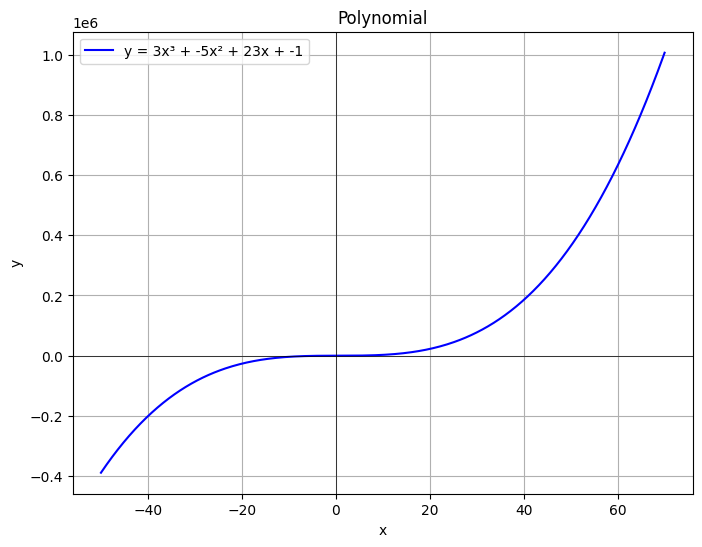

In [2]:
a = 3
b = -5
c = 23
d = -1

plot_cubic_polynomial(a, b, c, d, x_range=(-50, 70))

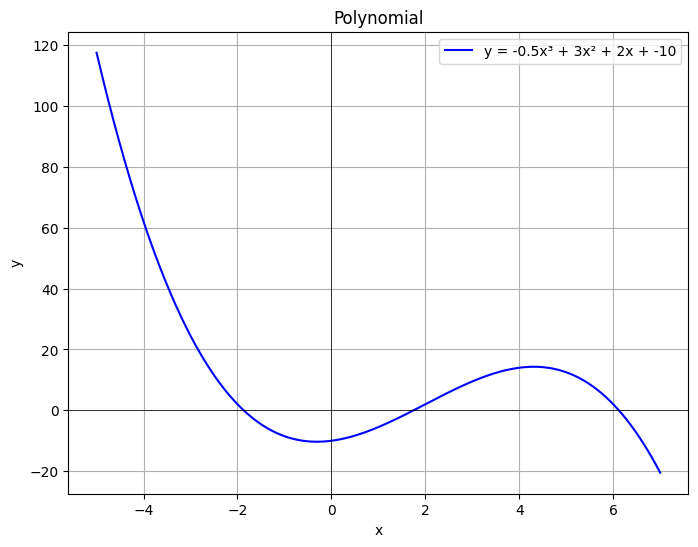

In [3]:
plot_cubic_polynomial(-0.5, 3, 2, -10, x_range=(-5, 7))

More general, non-polynomial algebraic functions and the so called
**transcedental functions**, such as $f(x) = e^{-x} -x = 0$ will be what we will cover first and we will focus on
finding one or more real roots. Although in some cases it is possible
to derive the root analytically, in many cases this is
impossible in which case our only option is to use numerical methods.

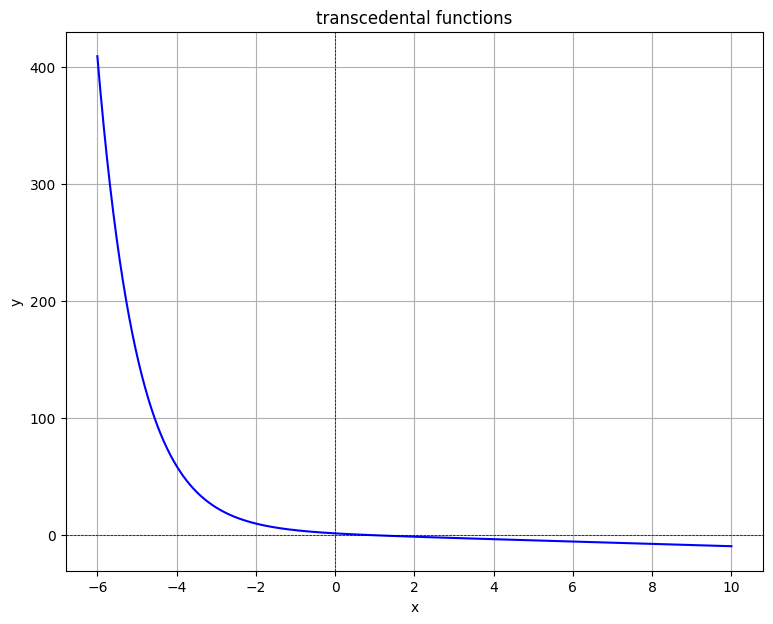

In [4]:
def plot_transcendental_function(foo = lambda x: np.exp(-x) - x, x_left = -6, x_right = 10):

    x = np.linspace(x_left, x_right, (x_right - x_left) * 100)
    y = foo(x)
    plt.figure(figsize=(9, 7))
    plt.plot(x, y, color='blue')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.title("transcedental functions")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

plot_transcendental_function()


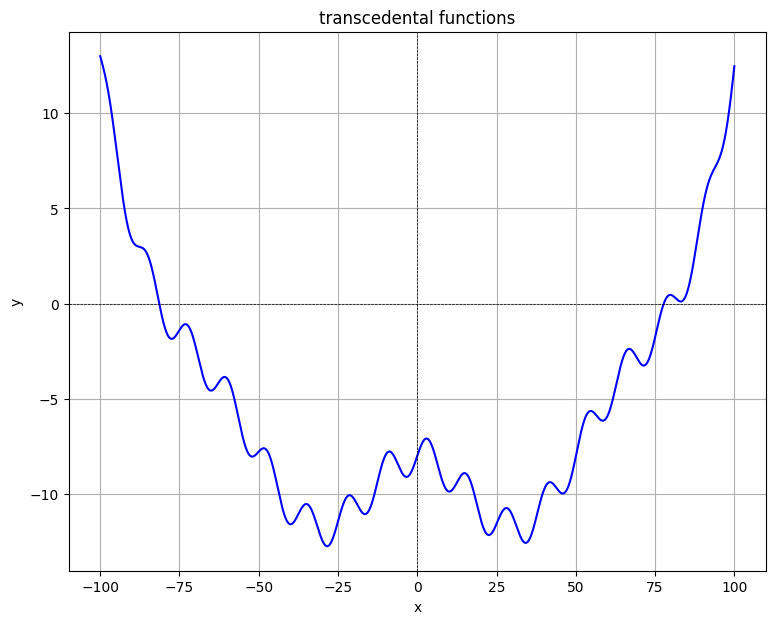

In [5]:
def foo(x):
  return np.sin(x/2) + 2*np.cos(x / 10) + 0.001*(x/8)**4 - 10
plot_transcendental_function(foo, -100, 100)

### Bisection Method

The **Bisection** method can be used to compute a zero of any function $f(x)$ that is continuous on an interval $[x_l, x_u]$ for which $f(x_l) \times f(x_u) <0$.

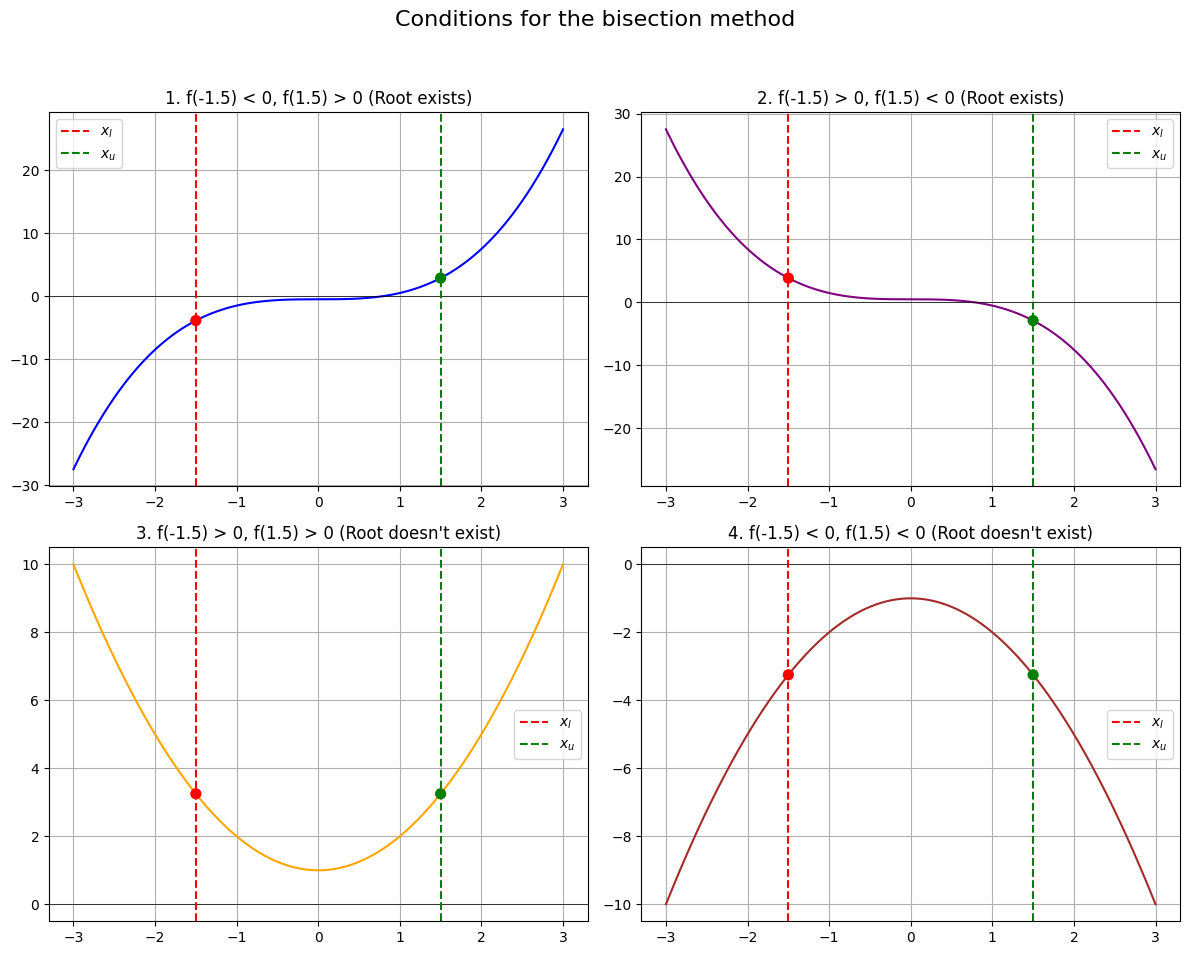

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_bisection_scenarios():
    x = np.linspace(-3, 3, 400)

    f1 = lambda x: x**3 - 0.5
    f2 = lambda x: -x**3 + 0.5
    f3 = lambda x: x**2 + 1
    f4 = lambda x: -(x**2) - 1

    xl, xu = -1.5, 1.5

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Conditions for the bisection method', fontsize=16)

    ax = axes[0, 0]
    ax.plot(x, f1(x), color='blue')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(xl, color='red', linestyle='--', label='$x_l$')
    ax.axvline(xu, color='green', linestyle='--', label='$x_u$')
    ax.scatter([xl, xu], [f1(xl), f1(xu)], color=['red', 'green'], s=50, zorder=5)
    ax.set_title(f'1. f({xl}) < 0, f({xu}) > 0 (Root exists)')
    ax.grid(True)
    ax.legend()

    ax = axes[0, 1]
    ax.plot(x, f2(x), color='purple')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(xl, color='red', linestyle='--', label='$x_l$')
    ax.axvline(xu, color='green', linestyle='--', label='$x_u$')
    ax.scatter([xl, xu], [f2(xl), f2(xu)], color=['red', 'green'], s=50, zorder=5)
    ax.set_title(f'2. f({xl}) > 0, f({xu}) < 0 (Root exists)')
    ax.grid(True)
    ax.legend()

    ax = axes[1, 0]
    ax.plot(x, f3(x), color='orange')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(xl, color='red', linestyle='--', label='$x_l$')
    ax.axvline(xu, color='green', linestyle='--', label='$x_u$')
    ax.scatter([xl, xu], [f3(xl), f3(xu)], color=['red', 'green'], s=50, zorder=5)
    ax.set_title(f'3. f({xl}) > 0, f({xu}) > 0 (Root doesn\'t exist)')
    ax.grid(True)
    ax.legend()

    ax = axes[1, 1]
    ax.plot(x, f4(x), color='brown')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(xl, color='red', linestyle='--', label='$x_l$')
    ax.axvline(xu, color='green', linestyle='--', label='$x_u$')
    ax.scatter([xl, xu], [f4(xl), f4(xu)], color=['red', 'green'], s=50, zorder=5)
    ax.set_title(f'4. f({xl}) < 0, f({xu}) < 0 (Root doesn\'t exist)')
    ax.grid(True)
    ax.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


plot_bisection_scenarios()

Consider $x_l$ and $x_u$ as **two initial approximation** to a zero, say $x_t$, of $f(x)$. The new approximation is the midpoint of the interval $[x_l, x_u]$ which is $x_r = \frac{x_l+x_u}{2}$.  

If $f(x_r) = 0$, the $x_r$ is the desired zero of $f(x)$. Otherwise, a new interval $[x_l, x_u]$ that is half the length of the previous interval is determined as follows.

If $f(x_l) \times f(x_r)<0$ then $[x_l, x_r]$ contains a zero, so set $x_u \leftarrow x_r$. Otherwise $f(x_u) \times f(x_r) < 0$ (necessarily) and $[x_r, x_u]$ contains a zero, so set $x_l \leftarrow x_r$.

The above procedure is repeated, continually halving the interval
$[x_l, x_u]$, until $[x_l, x_u]$ is sufficiently small, at which time
the midpoint $x_r = \frac{x_l+x_u}{2}$ will be arbitrarily close to a
zero of $f(x)$.

In [7]:
def visualize_bisection_case(f, xl, xu, case_title):
    xr = (xl + xu) / 2
    y_vals = np.linspace(f(min(xl, xu)), f(max(xl, xu)), 10)

    x_plot = np.linspace(xl - 0.5, xu + 0.5, 400)
    y_plot = f(x_plot)

    plt.figure(figsize=(8, 6))
    plt.plot(x_plot, y_plot, color='blue', label=r'$f(x)$')
    plt.axhline(0, color='black', linewidth=0.5)

    plt.plot([xl, xu], [f(xl), f(xu)], 'o-', color='black', markersize=8, label='Initial interval $[x_l, x_u]$')
    plt.plot(xr, f(xr), 'o', color='purple', markersize=16, label=r'$x_r$')
    plt.axvline(xl, color='black', linestyle='--', linewidth=0.8)
    plt.axvline(xu, color='black', linestyle='--', linewidth=0.8)

    if f(xr) == 0:
        plt.plot(xr, f(xr), 'x', color='red', markersize=12, mew=3, label='Root has found!')
    elif f(xl) * f(xr) < 0:
        plt.plot([xl, xr], [f(xl), f(xr)], 'o-', color='green', markersize=8, label='New interval $[x_l, x_r]$')
        plt.axvline(xr, color='green', linestyle='-', linewidth=1.5)
        plt.axvline(xl, color='black', linestyle='--', linewidth=0.8)
    else:
        plt.plot([xr, xu], [f(xr), f(xu)], 'o-', color='orange', markersize=8, label='New interval $[x_r, x_u]$')
        plt.axvline(xr, color='orange', linestyle='-', linewidth=1.5)
        plt.axvline(xu, color='black', linestyle='--', linewidth=0.8)

    plt.title(case_title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

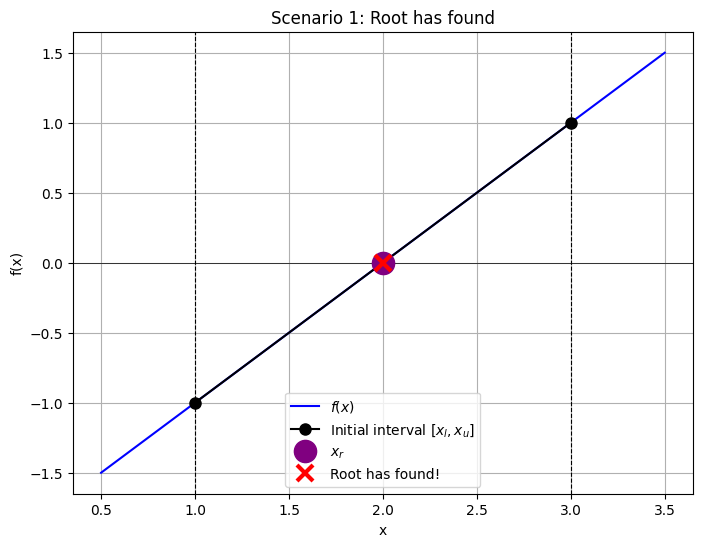

In [8]:
f_found = lambda x: (x - 2)
visualize_bisection_case(f_found, 1.0, 3.0, "Scenario 1: Root has found")

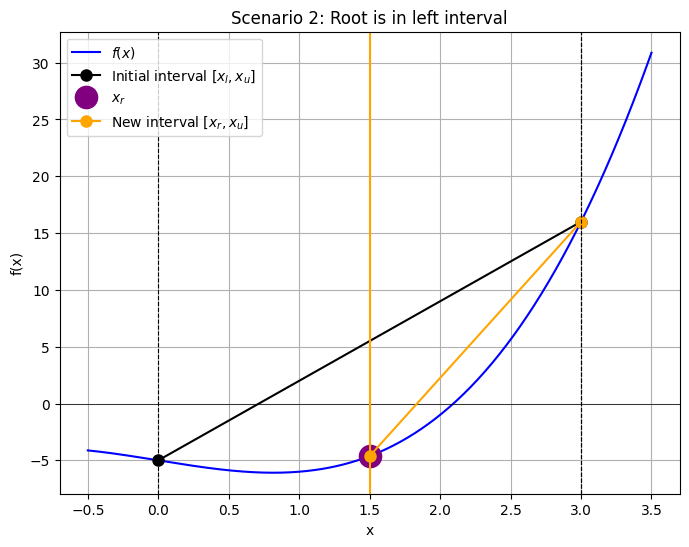

In [9]:
f = lambda x: x**3 - 2*x - 5
visualize_bisection_case(f, 0, 3, "Scenario 2: Root is in left interval")

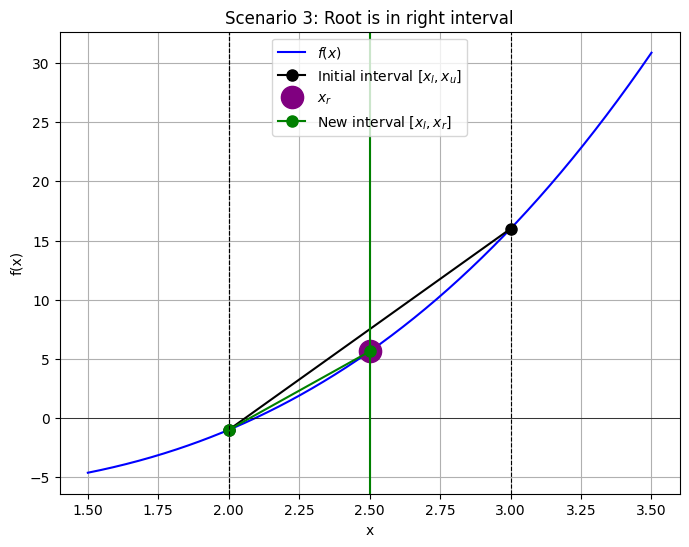

In [10]:
visualize_bisection_case(f, 2, 3, "Scenario 3: Root is in right interval")

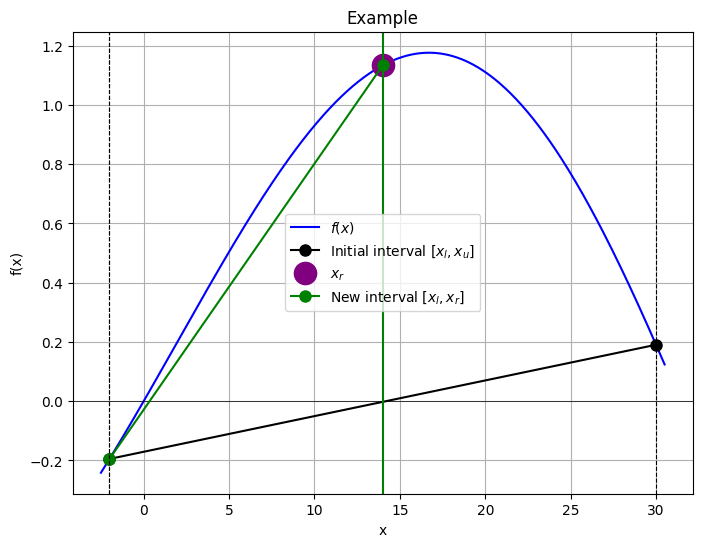

In [11]:
def foo(x):
  return np.sin(x/10) * np.exp(x*0.01)

visualize_bisection_case(foo, -2, 30, "Example")

How many iterations $n$ are required to obtain a desired accuracy?

Suppose you want the **absolute error** $< \varepsilon$, and that the length of the initial interval $[x_l, x_u]$ is $\Delta x^0$.

$x_1 = \frac{x_l+x_u}{2}$ => $|x_{true} - x_1| < \frac{\Delta x^0}{2}$  
$x_2$ => $|x_{true} - x_2| < \frac{\Delta x^0}{2*2}$  
$x_3$ => $|x_{true} - x_3| < \frac{\Delta x^0}{8}$  
...  
$x_n$ => $|x_{true} - x_n| < \frac{\Delta x^0}{2^n}$  

Therefore $\frac{\Delta x^0}{2^n} < \varepsilon$ implies that
$2^n > \frac{\Delta x^0}{\varepsilon}$ and $n > log_2\left( \frac{\Delta x^0}{\varepsilon}{}\right)$ or    
$ n \ln 2 > \ln{(\Delta x^0)} - \ln(\varepsilon) \;\; \mbox{and} \;\;\; n > \frac{\ln{(\Delta x^0)}-\ln{(\varepsilon)}}{\ln 2} $   


If initially $x_u - x_l = \Delta x^0 = 1$ and $\varepsilon = 10^{-5}$, then the above formula gives $n > 16.61$. Thus, 17 iterations would **guarantee** that the **absolute error** of the computed approximation to a zero $x_t$ of $f(x)$
is $ < 10^{-5} $.

In [12]:
xu = 1.0
xl = 0.0
max_err = 1e-5

error = xu - xl
_count_iterations = 0
while error > max_err:
  xu = (xu - xl) / 2
  error = xu - xl
  _count_iterations += 1
  print(xl, xu)

_count_iterations

0.0 0.5
0.0 0.25
0.0 0.125
0.0 0.0625
0.0 0.03125
0.0 0.015625
0.0 0.0078125
0.0 0.00390625
0.0 0.001953125
0.0 0.0009765625
0.0 0.00048828125
0.0 0.000244140625
0.0 0.0001220703125
0.0 6.103515625e-05
0.0 3.0517578125e-05
0.0 1.52587890625e-05
0.0 7.62939453125e-06


17

In [13]:
import numpy as np


def count_iterations(max_error, delta_0):
  return (np.log(delta_0) - np.log(max_error)) / (np.log(2))


In [14]:
count_iterations(1e-5, 1.0)

np.float64(16.609640474436812)

In [15]:
count_iterations(1e-10, 10.0)

np.float64(36.541209043760986)

**Example**

Use the Bisection method to find the positive root of $f(x)=x^2-3$ with $|E_{t}|<0.01$.  

First note that   
$x^2-3=0 \Longrightarrow (x+ \sqrt{3})(x- \sqrt{3}) \Longrightarrow x = \pm \sqrt{3} = \pm 1.73205...$  


Thus, we will start with $x_{l}=1$ and $x_{u}=2$, making $\Delta x^0 = 1$ and we know $\varepsilon = 0.01$. This means that we can calculate the number of iterations it will take to find the approximate root under these conditions.  

$n \geq \frac{\ln{(\Delta x^0)} - \ln{(\varepsilon)}}{\ln{(2)}} = \frac{\ln{(1)} - \ln{(0.01)}}{\ln{(2)}} = \frac{4.60517}{0.693147} = 6.64...$

Therefore it will take $n=7$ itereations of the Bisection method to find this root. I will summarize the results in the following table:

| iteration | $x_{l}$ | $x_{u}$ | $f(x_{l})$ | $f(x_{u})$ | $x_{r}=\frac{x_{l}+x_{u}}{2}$ | $f(x_{r})$ | $|E_{t}|$ | update         |
|-----------|---------|---------|------------|------------|---------------------------------|-------------|-----------|----------------|
| 1         | 1       | 2       | -2         | 1          | 1.5                             | -0.75       | 0.5       | $x_{l}=x_{r}$ |
| 2         | 1.5     | 2       | -0.75      | 1          | 1.75                            | 0.0625      | 0.25      | $x_{u}=x_{r}$ |
| 3         | 1.5     | 1.75    | -0.75      | 0.0625     | 1.625                           | -0.359      | 0.125     | $x_{l}=x_{r}$ |
| 4         | 1.625   | 1.75    | -0.359     | 0.0625     | 1.6875                          | -0.1523     | 0.0625    | $x_{l}=x_{r}$ |
| 5         | 1.685   | 1.75    | -0.1523    | 0.0625     | 1.7188                          | -0.0457     | 0.0313    | $x_{l}=x_{r}$ |
| 6         | 1.7188  | 1.75    | -0.0457    | 0.0625     | 1.7344                          | 0.0081      | 0.0156    | $x_{u}=x_{r}$ |
| 7         | 1.7188  | 1.7344  | -0.0457    | 0.0081     | 1.7266                          | -0.0189     | 0.0078    |                |


In [16]:
from scipy import optimize

def foo(x):
  return x ** 2 - 3

root = optimize.bisect(foo, 1, 2, xtol=1e-2)
root


1.7265625

Therefore $x_{t} \approx x_{r} = 1.7266$. (Note: the better choice here is $x_{u}=1.7344$ since $f(x_{u})=0.0081$ is closer to $0$).

**Convergence Criterion**  


As this is an iterative algorithm that computes a sequence of approximations:   

$ x_0, x_1, x_2, \dots, x_{i-1}, x_i, \dots $

to a zero $x_t$, recall that we can use the iterative approximation relative
error:   
$|\varepsilon_{a}| = \left| \frac{\mbox{current approx} - \mbox{previous approx}}{\mbox{current approx}} \right| = \left| \frac{x_i - x_{i-1}}{x_i}\right| = \left | 1 - \frac{x_{i-1}}{x_i} \right| $  

is a good approximation to the actual relative $|\varepsilon_t|$ in $x_i$, and can be used to determine the accuracy of $x_i$.

Note that each approximation $x_i$ is equal to $\frac{x_u + x_l}{2}$, and the previous approximation is either $x_l$ or $x_u$. Therefore:   
$|x_i - x_{i-1}| = \frac{x_u - x_l}{2} $  
thus   
$ |\varepsilon_a| = \frac{|x_i-x_{i-1}|}{|x_i|} = \frac{\frac{x_u-x_l}{2}}{\left| \frac{x_u + x_l}{2} \right|} = \frac{x_u - x_l}{|x_u + x_l|}$



***Advantages*** of the Bisection Method:  
- If $f(x)$ is continuous and if appropriate initial values $x_l$ and $x_u$ can be found, then the method is **guaranteed to converge**.  

***Disadvantages***

- converges slowly (requires more iterations than other methods)
- it may be difficult to find appropriate initial values
- it cannot be used to compute a zero $x_t$ of **even multiplicity** of a function $f(x)$; that is, if  

$f(x)=(x-x_t)^mg(x)$  


where $m$ is a positive even integer and $g(x_t) \neq 0$

### Python Basics

What is a function?

A function is a named block of code that can be reused.
It can:

- take arguments (inputs),

- return a result using `return`,

- be treated as an object (passed around, stored, etc.)

In [17]:
def greet(name):
    return f"Hello, {name}!"

print(greet("Alice"))  # Hello, Alice!


Hello, Alice!


You can assign default values to parameters.
If no value is passed, the default is used.

In [18]:
def greet(name="guest"):
    return f"Hello, {name}!"

print(greet())        # Hello, guest!
print(greet("Anna"))  # Hello, Anna!


Hello, guest!
Hello, Anna!


In [19]:
def f(x, y=0.0):
  return x ** 3 - y + x * y - 100

f(10), f(10, 5)

(900.0, 945)

Default values are evaluated once when the function is defined.
Avoid using mutable objects (`list`, `dict`) as defaults.

In [20]:
# DONT USE IT
def add_item(item, items=[]):
    items.append(item)
    return items
print(add_item(3))
print(add_item(5))

[3]
[3, 5]


In [21]:
def add_item(item, items=None):
    if items is None:
        items = []
    items.append(item)
    return items
print(add_item(3))
print(add_item(5))
c = [1, 2, 3]
print(add_item(4, c))

[3]
[5]
[1, 2, 3, 4]


Functions in Python are first-class objects.
That means they can be:

1. assigned to variables,

2. passed to other functions,

3. returned from functions.

Example:

In [22]:
def derivative(func, x, h=1e-10):
  return (func(x + h) - func(x)) / h

def foo(x):
  return x ** 2


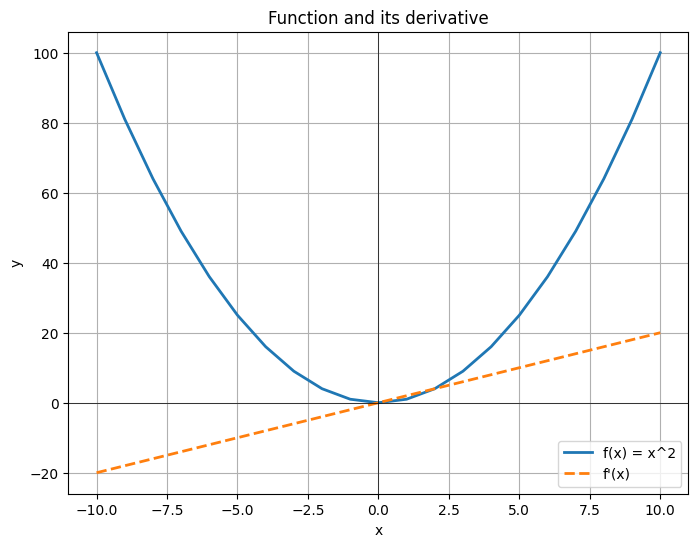

In [23]:
import matplotlib.pyplot as plt


x = [element for element in range(-10, 11)]
y = [foo(element) for element in x]
dy = [derivative(foo, element) for element in x]

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="f(x) = x^2", linewidth=2)
plt.plot(x, dy, label="f'(x)", linestyle="--", linewidth=2)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.title("Function and its derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

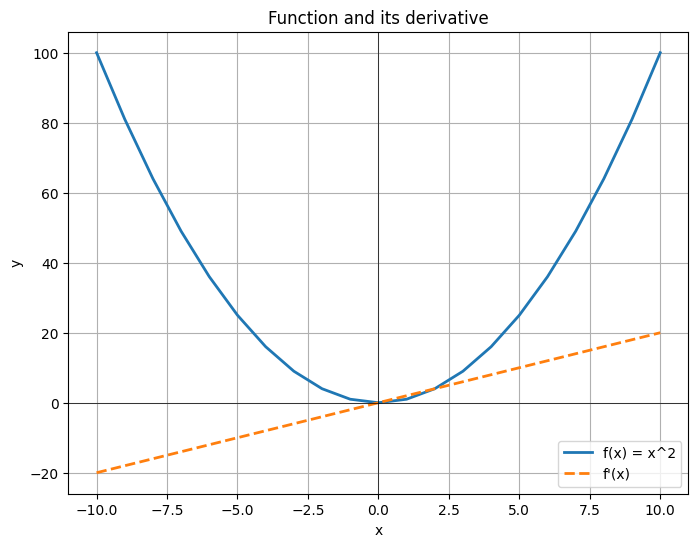

In [24]:
foo2 = lambda x: x ** 2

x = [element for element in range(-10, 11)]
y = [foo2(element) for element in x]
dy = [derivative(foo2, element) for element in x]

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="f(x) = x^2", linewidth=2)
plt.plot(x, dy, label="f'(x)", linestyle="--", linewidth=2)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.title("Function and its derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

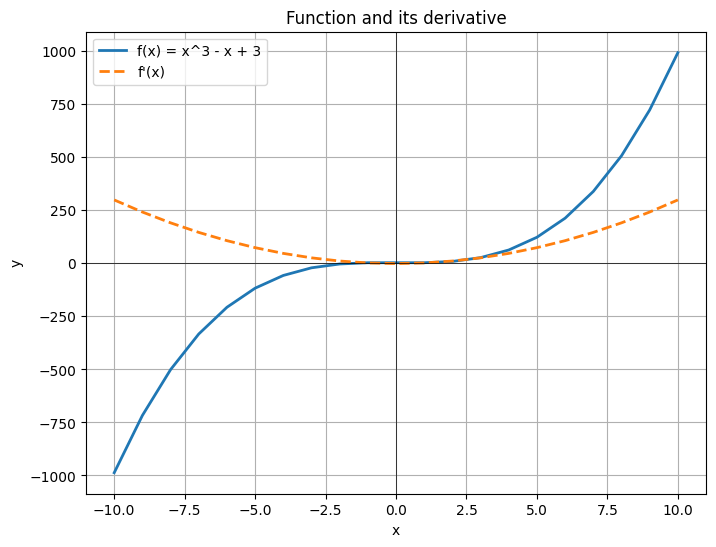

In [25]:
new_foo = lambda x: x ** 3 - x + 3

x = [element for element in range(-10, 11)]
y = [new_foo(element) for element in x]
dy = [derivative(new_foo, element) for element in x]

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="f(x) = x^3 - x + 3", linewidth=2)
plt.plot(x, dy, label="f'(x)", linestyle="--", linewidth=2)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.title("Function and its derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

**What is NumPy?**

NumPy (Numerical Python) is a library for fast mathematical computations.

It provides:

- arrays (like lists, but faster and more powerful),

- mathematical operations on arrays,

- tools for linear algebra, statistics, random numbers, and more.

In [26]:
import numpy as np


Array initialisation

In [27]:
a = np.array([1, 2, 3])
print(a)
print(type(a))

[1 2 3]
<class 'numpy.ndarray'>


In [28]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [29]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [30]:
np.arange(0, 3, 0.25)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75])

In [31]:
np.linspace(0, 1, 21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

Array props

In [32]:
a = np.array([[1, 2, 3], [4, 5, 6]])

In [33]:
a.shape # (rows, columns)

(2, 3)

In [34]:
a.ndim

2

In [35]:
a.size # total number of elements

6

In [36]:
a.dtype

dtype('int64')

Indexing and Slicing

In [37]:
a = np.array([10, 20, 30, 40, 50])
print(a[0])
print(a[-1])
print(a[1:4])

10
50
[20 30 40]


In [38]:
b = np.array([[1, 2, 3],
              [4, 5, 6]])
print(b[0, 1])
print(b[:, 0])

2
[1 4]


Array Operations

In [39]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

print(x + y)
print(x * y)
print(x ** 2)

[5 7 9]
[ 4 10 18]
[1 4 9]


In [40]:
print(np.sqrt(x))
print(np.mean(y))
print(np.max(y))
print(np.sum(y))

[1.         1.41421356 1.73205081]
5.0
6
15


In [41]:
A = np.array([[1, 2],
              [3, 4]])
B = np.array([[5, 6],
              [7, 8]])

print(A @ B)          # Matrix multiplication
print(np.dot(A, B))   # Matrix multiplication
print(A.T)            # Transpose


[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[1 3]
 [2 4]]


Random Numbers

In [42]:
np.random.seed(42)
print(np.random.rand(3))
print(np.random.randint(0, 10, (2, 3)))


[0.37454012 0.95071431 0.73199394]
[[4 6 9]
 [2 6 7]]


In [43]:
def derivative(func, x, h=1e-10):
  return (func(x + h) - func(x)) / h

def foo(x):
  return x ** 2

x = np.linspace(0, 1, 21)
y = foo(x)
dy = derivative(foo, x)

In [44]:
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [45]:
y

array([0.    , 0.0025, 0.01  , 0.0225, 0.04  , 0.0625, 0.09  , 0.1225,
       0.16  , 0.2025, 0.25  , 0.3025, 0.36  , 0.4225, 0.49  , 0.5625,
       0.64  , 0.7225, 0.81  , 0.9025, 1.    ])

In [46]:
dy

array([1.00000000e-10, 9.99999996e-02, 1.99999982e-01, 3.00000025e-01,
       4.00000033e-01, 5.00000041e-01, 6.00000050e-01, 7.00000058e-01,
       8.00000066e-01, 9.00000074e-01, 1.00000008e+00, 1.10000009e+00,
       1.20000010e+00, 1.30000011e+00, 1.40000012e+00, 1.50000012e+00,
       1.60000013e+00, 1.70000014e+00, 1.80000015e+00, 1.90000016e+00,
       2.00000017e+00])

The volume of liquid in a spherical tank is given by

$V = \frac{\pi h^2 (3R - h)}{3}$  


where $h$ is the depth of the liquid and $R$ is the radius. If $R=3$, to what depth must the tank be filled so that it contains $V=30m^2$ of water? Use the Bisection Method to solve this problem within 1000 iterations in Python using scipy.

In [47]:
from scipy import optimize

def foo(h, R=3, V=30):
  return (np.pi * h ** 2 * (3 * R - h)) / 3 - V

root = optimize.bisect(foo, 1, 3, xtol=1e-20, maxiter=1000)
root

2.0269057283100143

Sometimes we can't set the parameters to default right away, and at the same time we need to pass the function as an argument. Functional programming, the method partial will help in this.

In [48]:
from functools import partial

foo_only_for_h = partial(foo, R=3, V=30) # freeze R and V

In [49]:
root = optimize.bisect(foo_only_for_h, 1, 3, xtol=1e-20, maxiter=1000)
root

2.0269057283100143

In [50]:
foo_only_for_h(5)

74.71975511965978